In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

In [14]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*d(M[k], X[n])
    return cost

In [15]:
def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    exponents = np.empty((N, K))

    
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    return M, R

In [16]:
def get_simple_data():
    D = 2 
    s = 4 
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

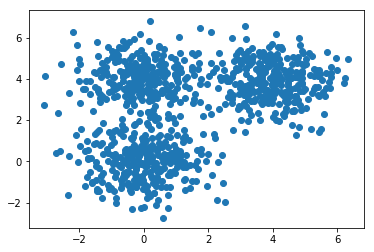

In [17]:
X = get_simple_data()
plt.scatter(X[:,0], X[:,1])
plt.show()

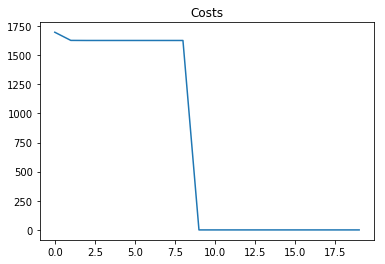

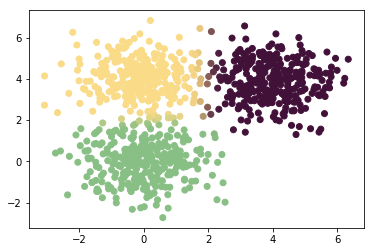

(array([[-0.00494176, -0.06231824],
        [-0.08419697,  4.00173447],
        [ 3.9963237 ,  3.89843837]]),
 array([[1.00000000e+00, 5.33303977e-11, 5.21712772e-13],
        [1.00000000e+00, 1.64969698e-10, 4.00683682e-16],
        [9.52342732e-01, 3.72558050e-03, 4.39316876e-02],
        ...,
        [4.58160877e-05, 9.99952244e-01, 1.93969790e-06],
        [1.11598352e-08, 9.99999987e-01, 1.65345684e-09],
        [1.02302641e-08, 9.99982296e-01, 1.76937180e-05]]))

In [18]:
K = 3 
plot_k_means(X, K)

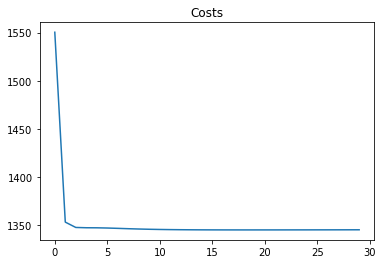

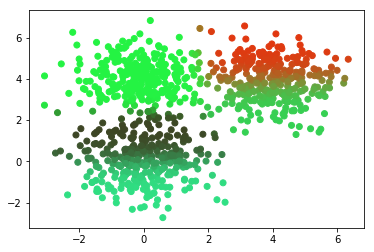

(array([[ 0.02438641, -0.67058945],
        [ 3.93780542,  4.56789399],
        [ 4.00604605,  3.20853924],
        [-0.03144765,  0.77830953],
        [-0.11629862,  4.08063108]]),
 array([[9.50072202e-01, 3.24005522e-16, 1.09701677e-10, 4.99277974e-02,
         1.01220112e-11],
        [9.23400968e-01, 3.88536026e-19, 8.41046152e-14, 7.65990317e-02,
         4.05557482e-11],
        [2.52289003e-02, 2.02536389e-04, 1.70598174e-01, 8.03583964e-01,
         3.86424647e-04],
        ...,
        [7.03912944e-07, 8.52701522e-07, 3.49420281e-06, 6.29241538e-03,
         9.93702534e-01],
        [3.90016767e-11, 2.49514624e-09, 5.96500085e-10, 7.07808030e-06,
         9.99992919e-01],
        [3.92444854e-11, 2.63541156e-05, 6.61577708e-06, 6.91519992e-06,
         9.99960115e-01]]))

In [19]:
K = 5 
plot_k_means(X, K, max_iter=30)

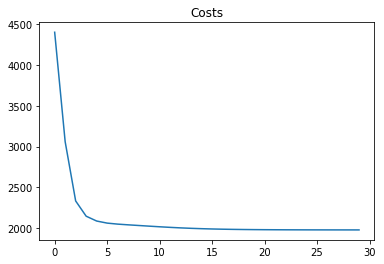

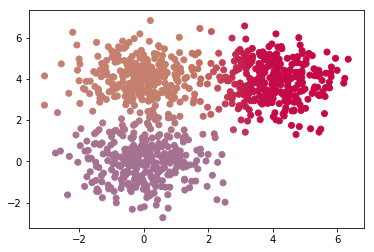

(array([[ 0.17565931,  3.92651553],
        [ 0.00659044, -0.00433518],
        [ 0.00660591, -0.00422175],
        [ 0.08774977,  3.92951978],
        [ 4.0562953 ,  3.9029994 ]]),
 array([[6.40315091e-04, 4.99354735e-01, 4.99318663e-01, 5.92047883e-04,
         9.42397825e-05],
        [7.61929987e-04, 4.99257708e-01, 4.99220654e-01, 7.49109060e-04,
         1.05990085e-05],
        [9.81773659e-02, 3.47485484e-01, 3.47541164e-01, 8.62443753e-02,
         1.20551611e-01],
        ...,
        [4.74808900e-01, 2.45844523e-02, 2.45922889e-02, 4.68601530e-01,
         7.41282938e-03],
        [4.87067348e-01, 2.56195575e-03, 2.56299624e-03, 5.06744936e-01,
         1.06276346e-03],
        [4.97310322e-01, 2.14699724e-03, 2.14790901e-03, 4.83126197e-01,
         1.52685748e-02]]))

In [20]:
K = 5 
plot_k_means(X, K, max_iter=30, beta=0.3)